In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import datetime
import numpy as np
import os
import cv2

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [13]:
X = []
y = []
heightImg = 28
widhtImg = 28

for i in range(0, 10):
    for d in os.listdir("../dataset/digits/{}".format(i)):
        t_img = cv2.imread("../dataset/digits/{}".format(i)+"/"+d)
        t_img = cv2.cvtColor(t_img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(t_img, (heightImg,widhtImg))
        X.append(img)
        y.append(i)

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
print(X.shape)
y.shape

(9539, 28, 28)


(9539,)

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state= 21)

In [19]:
X_train.shape

(7631, 28, 28)

In [20]:
y_test

array([0, 2, 2, ..., 0, 0, 8])

In [21]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
num_classes

10

In [23]:
def larger_model():
    # create model
	model = keras.Sequential(
    [
        Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(15, (3, 3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(50, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    

    # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [24]:
model = larger_model()
log_dir = r"C:/Users/User/WORK/workspace-ia/PROJETS/projet_sudoku/model/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10,callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
764/764 [==============================] - 9s 7ms/step - loss: 1.2463 - accuracy: 0.5703 - val_loss: 0.4676 - val_accuracy: 0.8679
Epoch 2/10
764/764 [==============================] - 5s 7ms/step - loss: 0.4407 - accuracy: 0.8662 - val_loss: 0.2594 - val_accuracy: 0.9214
Epoch 3/10
764/764 [==============================] - 4s 5ms/step - loss: 0.2762 - accuracy: 0.9139 - val_loss: 0.2022 - val_accuracy: 0.9397
Epoch 4/10
764/764 [==============================] - 4s 5ms/step - loss: 0.1976 - accuracy: 0.9400 - val_loss: 0.1826 - val_accuracy: 0.9486
Epoch 5/10
764/764 [==============================] - 4s 6ms/step - loss: 0.1509 - accuracy: 0.9554 - val_loss: 0.1521 - val_accuracy: 0.9523
Epoch 6/10
764/764 [==============================] - 5s 6ms/step - loss: 0.1246 - accuracy: 0.9568 - val_loss: 0.1302 - val_accuracy: 0.9596
Epoch 7/10
764/764 [==============================] - 5s 6ms/step - loss: 0.1115 - accuracy: 0.9646 - val_loss: 0.1385 - val_accuracy: 0.9523
Epoch 

In [26]:
# OLD : [0.09560658782720566, 0.9682080745697021]
scores

[0.10683777928352356, 0.9706498980522156]

In [34]:
pred = model.predict(X_test,verbose = 1)
pred_classes = []

for p in pred:
    classIndex = np.argmax(p)
    probabilityValue = np.amax(p)
    
    if probabilityValue > 0.65:
        pred_classes.append(classIndex)
    else:
        pred_classes.append(0)
pred_classes

60/60 [==============================] - 0s 4ms/step


[0,
 2,
 2,
 9,
 7,
 7,
 9,
 7,
 1,
 0,
 1,
 9,
 1,
 5,
 0,
 7,
 0,
 8,
 9,
 2,
 4,
 8,
 6,
 2,
 6,
 4,
 8,
 0,
 1,
 3,
 5,
 7,
 6,
 0,
 1,
 0,
 4,
 6,
 7,
 9,
 2,
 4,
 6,
 2,
 2,
 5,
 1,
 2,
 4,
 4,
 1,
 9,
 5,
 9,
 2,
 9,
 5,
 2,
 4,
 1,
 4,
 6,
 4,
 7,
 4,
 9,
 2,
 2,
 1,
 0,
 5,
 7,
 9,
 4,
 7,
 5,
 2,
 3,
 6,
 5,
 3,
 6,
 7,
 0,
 1,
 2,
 4,
 0,
 8,
 3,
 9,
 5,
 7,
 8,
 1,
 2,
 7,
 6,
 9,
 3,
 1,
 1,
 9,
 0,
 0,
 9,
 3,
 9,
 6,
 6,
 5,
 2,
 2,
 6,
 0,
 1,
 8,
 0,
 5,
 4,
 2,
 2,
 3,
 0,
 2,
 6,
 1,
 0,
 5,
 4,
 1,
 3,
 1,
 5,
 5,
 3,
 7,
 3,
 6,
 5,
 1,
 8,
 7,
 2,
 6,
 6,
 2,
 0,
 5,
 1,
 3,
 7,
 2,
 1,
 5,
 8,
 3,
 7,
 6,
 2,
 9,
 2,
 6,
 7,
 6,
 8,
 9,
 4,
 8,
 0,
 9,
 7,
 0,
 1,
 0,
 5,
 9,
 8,
 7,
 3,
 7,
 4,
 4,
 9,
 0,
 8,
 7,
 1,
 3,
 7,
 1,
 2,
 6,
 0,
 5,
 4,
 0,
 7,
 9,
 3,
 6,
 0,
 7,
 9,
 4,
 8,
 9,
 4,
 8,
 5,
 5,
 0,
 2,
 2,
 3,
 8,
 5,
 6,
 2,
 4,
 0,
 0,
 6,
 0,
 3,
 0,
 8,
 5,
 5,
 2,
 8,
 3,
 9,
 8,
 0,
 9,
 0,
 8,
 8,
 7,
 7,
 0,
 0,
 2,
 9,
 2,
 7,
 1,
 2,
 0,


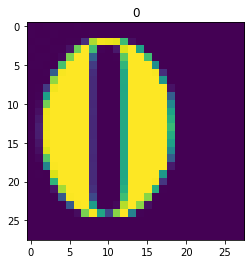

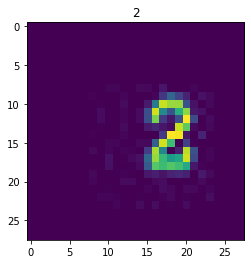

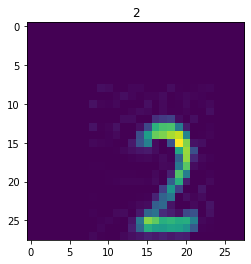

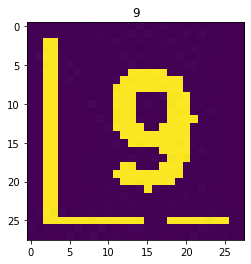

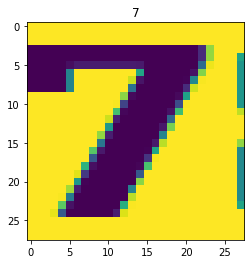

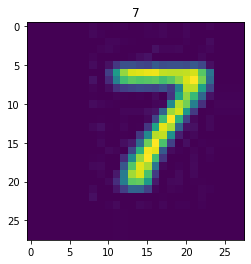

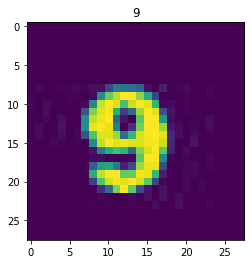

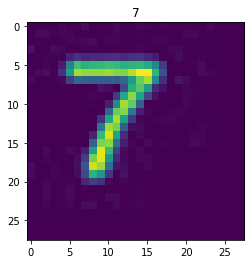

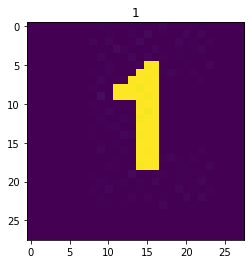

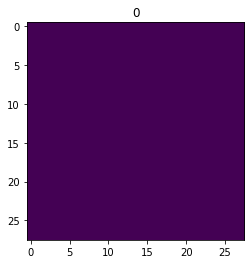

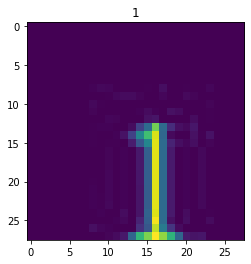

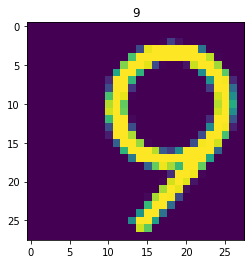

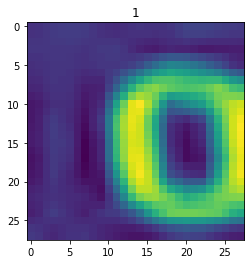

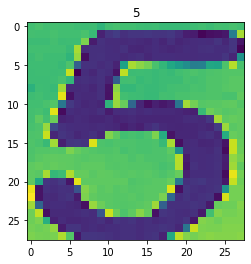

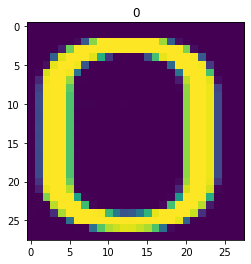

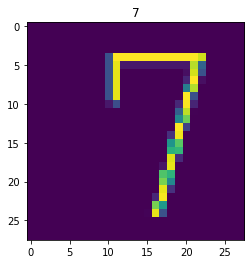

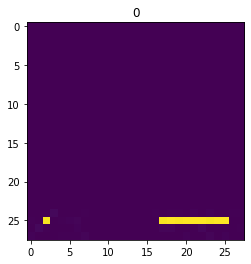

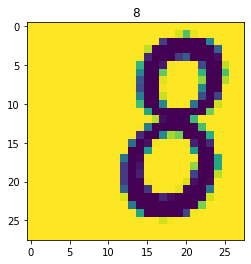

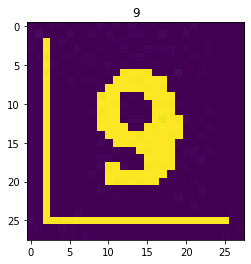

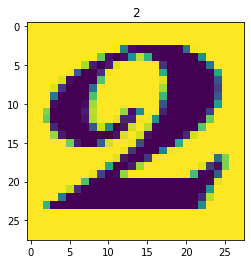

In [36]:
import matplotlib.pyplot as plt

for i in range(20):
    
    plt.imshow(X_test[i])
    plt.title(pred_classes[i])
    plt.show()

In [37]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [39]:
model.save(r"C:\Users\User\WORK\workspace-ia\PROJETS\projet_sudoku\model\aurao")

INFO:tensorflow:Assets written to: C:\Users\User\WORK\workspace-ia\PROJETS\projet_sudoku\model\aurao\assets


INFO:tensorflow:Assets written to: C:\Users\User\WORK\workspace-ia\PROJETS\projet_sudoku\model\aurao\assets
